**CSE-221710313020-K.NEHA**

# **Heart** **Disease** **Prediction**

# **Aim**

-> In this data science project, I have collected the dataset from Kaggle (https://www.kaggle.com/johnsmith88/heart-disease-dataset) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

dataset: https://github.com/kannekanti-neha/DS/blob/master/heart.csv

**The** **dataset** **consists** **of** **303** **individuals** **data**. **There** **are** **14** **columns** **in** **the** **dataset**, **which** **are** **described** **below**:

1. Age: displays the age of the individual.
2. Sex: displays the gender of the individual using the following format :

    1 = male

    0 = female

3. Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :

    1 = typical angina

    2 = atypical angina

    3 = non — anginal pain

    4 = asymptotic

4. Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)

5. Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.

    If fasting blood sugar > 120mg/dl then : 1 (true)

     else : 0 (false)

7. Resting ECG : displays resting electrocardiographic results

     0 = normal

     1 = having ST-T wave abnormality

      2 = left ventricular hyperthrophy

8. Max heart rate achieved : displays the max heart rate achieved by an individual.

9. Exercise induced angina :

    1 = yes

    0 = no

10. ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. Peak exercise ST segment :

    1 = upsloping

    2 = flat

    3 = downsloping

12. Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. Thal : displays the thalassemia :

    0 = normal

    1 = fixed defect

    2 = reversible defect

14. Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :

    0 = absence

    1, 2, 3, 4 = present.

# **Import** **libraries**

->Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

->For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the train_test_split method. To scale the features, I am using StandardScaler.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Import** **dataset**

In [ ]:
 heart = pd.read_csv('heart.csv')

-> The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using the desribe() and info() methods before I actually start processing and visualizing it.

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


-> Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value 

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


-> The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
heart.shape

(1025, 14)

In [ ]:
heart.size

14350

#checking whether there are balanced number of 0's and 1's

In [ ]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

-> There is no balanced count of 0 and 1 so, to balance them by equal values iam using down sampling

In [ ]:
# Separate input features (X) and target variable (y)
y = heart.target
X = heart.drop('target', axis=1)

# **Down** **Sampling**

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
heart_majority = heart[heart.target==0]
heart_minority = heart[heart.target==1]
 
# Downsample majority class
heart_majority_downsampled = resample(heart_majority, 
                                 replace=True,    # sample without replacement
                                 n_samples=526,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
heart_downsampled = pd.concat([heart_majority_downsampled, heart_minority])
 
# Display new class counts
heart_downsampled.target.value_counts()

1    526
0    526
Name: target, dtype: int64

->now, i got a equal values by doing down sampling and it is a balanced dataset

# **checking for missing values** **and duplicated values**

In [ ]:
heart.isnull().sum() # no null values in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print('duplicated entries: {}'.format(heart.duplicated().sum()))

duplicated entries: 723


In [ ]:
heart.drop_duplicates(inplace = True)
heart.shape

(302, 14)

In [ ]:
print('duplicate entries: {}'.format(heart.duplicated().sum())) #no duplicates values in the dataset

duplicate entries: 0


Understanding the data:

# **Correlation** **Matrix**

>Now, we can use visualizations to better understand our data and then look at any processing we might want to do.



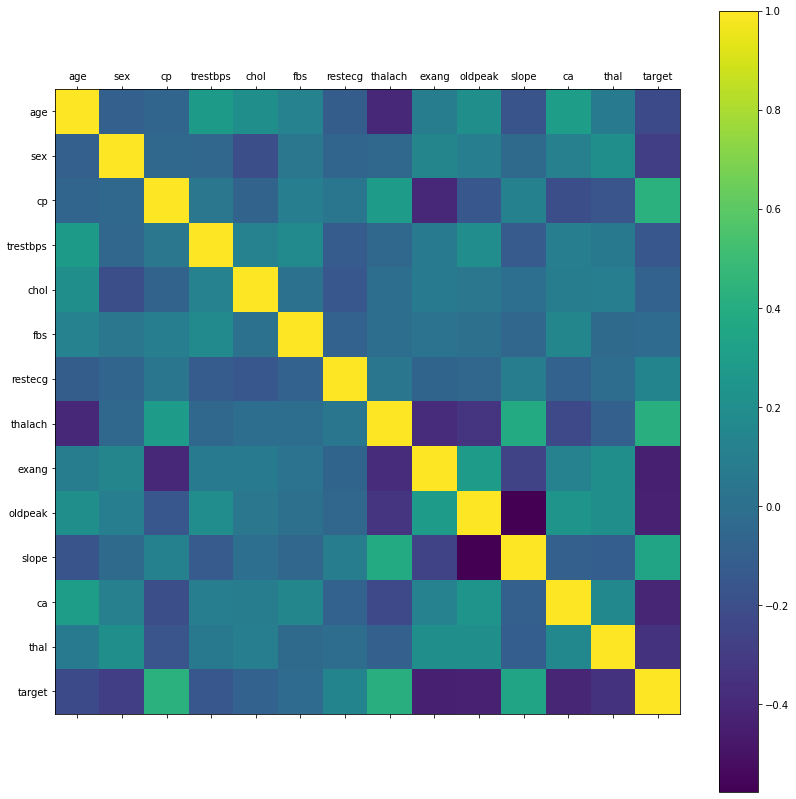

In [ ]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(heart.corr())
plt.yticks(np.arange(heart.shape[1]), heart.columns)
plt.xticks(np.arange(heart.shape[1]), heart.columns)
plt.colorbar()

-> Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive. Next, I'll take a look at the histograms for each variable.

# **Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78c69af400>,
      dtype=object)

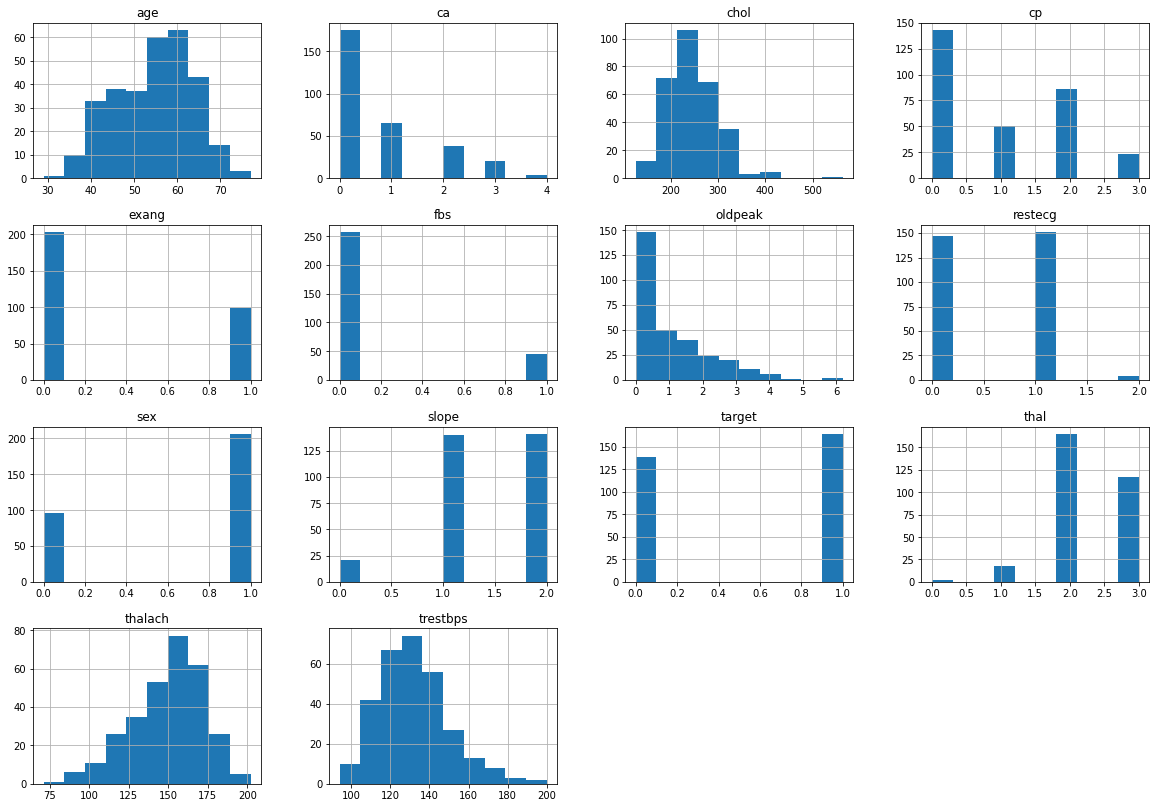

In [ ]:
heart.hist()

-> Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

->It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

Text(0.5, 1.0, 'Count of each Target Class')

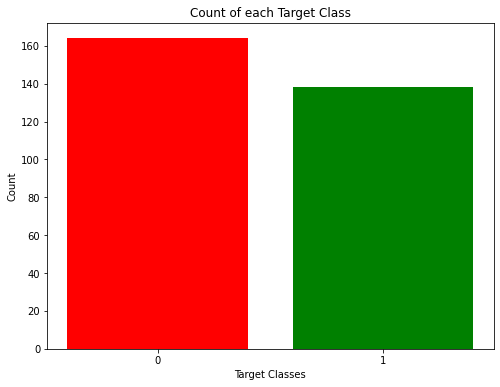

In [ ]:
rcParams['figure.figsize'] = 8,6
plt.bar(heart['target'].unique(), heart['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

-> The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

# Data **Processing**

**Now,I will use the StandardScaler from sklearn to scale my dataset.**

In [ ]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1.175316,1.509071,0.421525,-0.028080,-0.236701,1.468418,-1.468418,-1.04042,-0.425778,1.575677,-0.203069,0.409426,-0.409426,-0.923694,0.96115,-0.142134,0.728219,-0.728219,-0.272888,-0.96115,1.104437,0.809776,-0.504637,-0.384353,-0.239983,-0.1,-0.070535,-0.239983,0.914529,-0.809776
1,0.210655,0.013328,-0.456102,0.631484,-0.889446,-0.681005,0.681005,-1.04042,2.348644,-0.634648,-0.203069,0.409426,-0.409426,1.082609,-1.04042,-0.142134,0.728219,-0.728219,-0.272888,-0.96115,1.104437,0.809776,-0.504637,-0.384353,-0.239983,-0.1,-0.070535,-0.239983,-1.093459,1.234909
2,0.853762,0.013328,0.311822,-2.270600,0.089672,1.468418,-1.468418,-1.04042,-0.425778,1.575677,-0.203069,0.409426,-0.409426,-0.923694,0.96115,-0.142134,0.728219,-0.728219,-0.272888,1.04042,-0.905439,-1.234909,1.981623,-0.384353,-0.239983,-0.1,-0.070535,-0.239983,-1.093459,1.234909
3,0.425024,-0.584969,1.719682,1.027223,-0.889446,1.468418,-1.468418,-1.04042,-0.425778,1.575677,-0.203069,0.409426,-0.409426,-0.923694,0.96115,-0.142134,0.728219,-0.728219,-0.272888,-0.96115,1.104437,0.809776,-0.504637,-0.384353,-0.239983,-0.1,-0.070535,-0.239983,0.914529,-0.809776
4,0.210655,-0.584969,-0.968051,0.587513,0.660823,-0.681005,0.681005,-1.04042,-0.425778,-0.634648,4.924429,0.409426,-0.409426,1.082609,-1.04042,-0.142134,0.728219,-0.728219,-0.272888,1.04042,-0.905439,0.809776,-0.504637,-0.384353,-0.239983,-0.1,-0.070535,-0.239983,-1.093459,1.234909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.210655,-0.584969,-0.108708,0.895310,-0.889446,-0.681005,0.681005,-1.04042,2.348644,-0.634648,-0.203069,0.409426,-0.409426,-0.923694,0.96115,-0.142134,0.728219,-0.728219,3.664502,-0.96115,-0.905439,0.809776,-0.504637,-0.384353,-0.239983,-0.1,-0.070535,-0.239983,0.914529,-0.809776
96,-0.968375,-1.183266,0.330106,-0.731616,0.089672,-0.681005,0.681005,-1.04042,-0.425778,-0.634648,4.924429,0.409426,-0.409426,-0.923694,0.96115,-0.142134,0.728219,-0.728219,-0.272888,1.04042,-0.905439,0.809776,-0.504637,-0.384353,-0.239983,-0.1,-0.070535,-0.239983,-1.093459,1.234909
97,1.175316,0.491966,0.659216,1.115165,0.252858,-0.681005,0.681005,-1.04042,-0.425778,-0.634648,4.924429,-2.442441,2.442441,1.082609,-1.04042,-0.142134,0.728219,-0.728219,-0.272888,1.04042,-0.905439,-1.234909,1.981623,-0.384353,-0.239983,-0.1,-0.070535,-0.239983,0.914529,-0.809776
98,-0.968375,-0.884117,0.256970,1.598846,-0.889446,-0.681005,0.681005,0.96115,-0.425778,-0.634648,-0.203069,0.409426,-0.409426,1.082609,-1.04042,-0.142134,0.728219,-0.728219,-0.272888,-0.96115,1.104437,0.809776,-0.504637,-0.384353,-0.239983,-0.1,-0.070535,-0.239983,0.914529,-0.809776


# **Machine Learning**

-> I'll now import train_test_split to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [ ]:
y = heart['target']
X = heart.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

Next, I'll import all the Machine Learning algorithms I will be using.

1.logistic regression

2.naive bayes classifier

3.K Neighbors Classifier


# **Logistic Regression**


->**Import LogisticRegression from sklearn.linear_model and create an object. Fit the model on training data**


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression

In [ ]:
## We have to apply this object(log_reg) to the training data
log_reg.fit(X_train, y_train) # with help of fit method we are fitting the 
                            ##Logistic Regression on training data
## objectName.fit(InputData, OutputData)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Predicting on Train data**


In [ ]:
y_train_pred = log_reg.predict(X_train)

In [ ]:
y_train ==y_train_pred

426     True
58     False
363     True
19      True
299     True
       ...  
425     True
271     True
143     True
50      True
232     True
Name: target, Length: 202, dtype: bool

-> Visualizing the confusion matrix using heat map


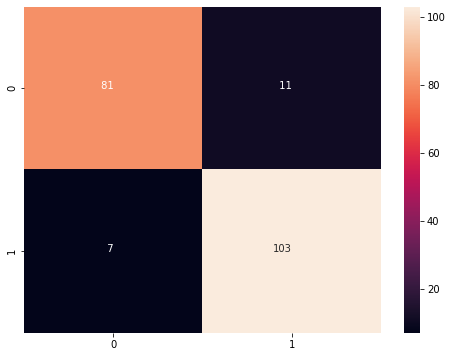

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

-> Finding the accuracy score:


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9108910891089109

-> Print the classification report and check the accuracy of the training data

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90        92
           1       0.90      0.94      0.92       110

    accuracy                           0.91       202
   macro avg       0.91      0.91      0.91       202
weighted avg       0.91      0.91      0.91       202



-> **We got an accuracy score of around 91% for the training** **Now let’s check the same for test data. **

# **Predicting on Test data**

In [ ]:
y_test_pred = log_reg.predict(X_test)

In [ ]:
y_test==y_test_pred

342     True
191     True
349    False
288     True
56      True
       ...  
172     True
391    False
629    False
197     True
720    False
Name: target, Length: 100, dtype: bool

-> **Visualizing the confusion matrix using heat map**

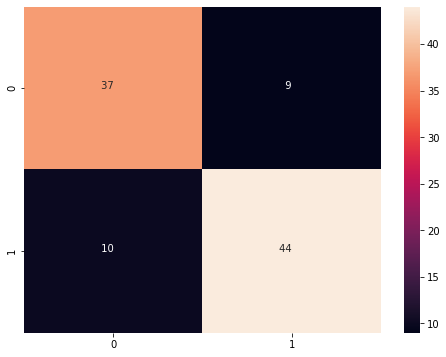

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

-> Finding the accuracy score:

In [ ]:
accuracy_score(y_test, y_test_pred)

0.81

-> Print the classification report and check the accuracy of the testing data



In [116]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        46
           1       0.83      0.81      0.82        54

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



**We got an accuracy score of around 81% for the testing**

# **Naive Bayes Classifier**


In [ ]:
# Apply the naive Bayes Algorithm
# Import BernNB
from sklearn.naive_bayes import BernoulliNB
# creating an object for BerNB
model_BernNB = BernoulliNB()

In [ ]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

# **Predicting on Train data**

In [ ]:
y_train_pred = model_BernNB.predict(X_train)

In [ ]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[80, 12],
       [12, 98]])

-> **Print the classification report and check the accuracy of the testing data**

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        92
           1       0.89      0.89      0.89       110

    accuracy                           0.88       202
   macro avg       0.88      0.88      0.88       202
weighted avg       0.88      0.88      0.88       202



-> **Finding the accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8811881188118812

# **Predicting on Test data**

In [ ]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_test, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_test_pred = model_BernNB.predict(X_test)

In [ ]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[37,  9],
       [10, 44]])

-> **Print the classification report and check the accuracy of the testing data**

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        46
           1       0.83      0.81      0.82        54

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



-> **Finding the accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.81

# **K Neighbors Classifier**

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [ ]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [ ]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0])

In [112]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        92
           1       0.86      0.92      0.89       110

    accuracy                           0.87       202
   macro avg       0.87      0.87      0.87       202
weighted avg       0.87      0.87      0.87       202



In [ ]:
from sklearn.metrics import accuracy_score
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores
    

[0.73,
 0.73,
 0.79,
 0.79,
 0.76,
 0.77,
 0.75,
 0.78,
 0.77,
 0.8,
 0.79,
 0.8,
 0.8,
 0.8,
 0.77,
 0.78,
 0.77,
 0.79,
 0.78]

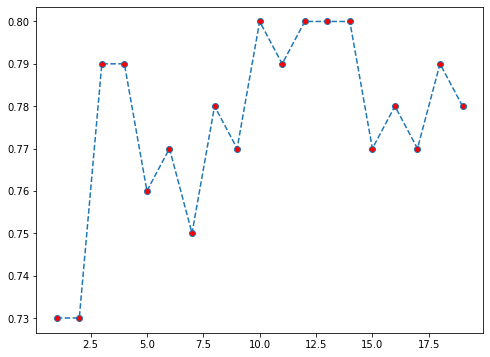

In [ ]:
# Plot of K values and Scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor='r', linestyle='--')

In [ ]:
# Optimum k value is 7
final_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [111]:
# Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0])

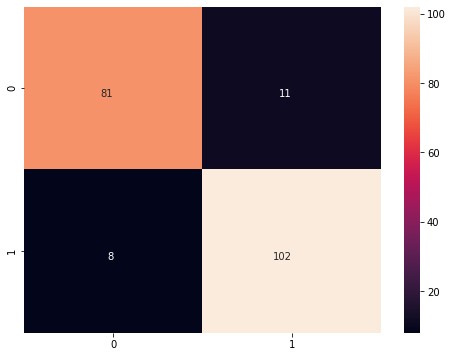

In [110]:
 #Confusion Matrix of Training data
#Syntax: confusion_matrix(ActualValues, Predicted Values)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot=True, 
            fmt='d', annot_kws={'va':'top','ha':'right'}) # d--> integer formatting

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8712871287128713

In [114]:
# Classification report for training Data
# Precision--> PPV--> Out of the positive predicted values, how many truely positive
print(classification_report(y_train, final_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        92
           1       0.90      0.93      0.91       110

    accuracy                           0.91       202
   macro avg       0.91      0.90      0.90       202
weighted avg       0.91      0.91      0.91       202



In [104]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

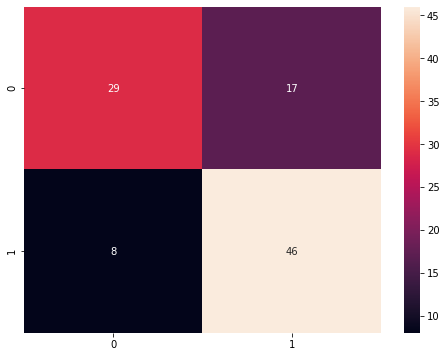

In [105]:
# Compare actual values of test data(y_test) and final_test_pred(model predicted values)
# Confusion_matrix(actualValues, predictedValues)
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.81

In [106]:
# Classification Report for Test Data
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70        46
           1       0.73      0.85      0.79        54

    accuracy                           0.75       100
   macro avg       0.76      0.74      0.74       100
weighted avg       0.75      0.75      0.75       100



# **Conclusion:**

1.logistic regression:81-91%

2.naive bayes classifier:81-88%

3.knn classifier:76-91%


-> In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. I then applied 3 Machine Learning algorithms, K Neighbors Classifier, logistic regression ,naive bayes classifier. I varied parameters across each model to improve their scores. In the end,  Logistic Regression achieved the highest score of 81-91% as compared to other algorithms